# TODO:
 - Experiment with U-Net
 - ~~Use Pillow and downsdcale~
 - Polish SLIC results and Remove blue pixels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [3]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1400x1400 with 1 Axes>, <AxesSubplot:>)

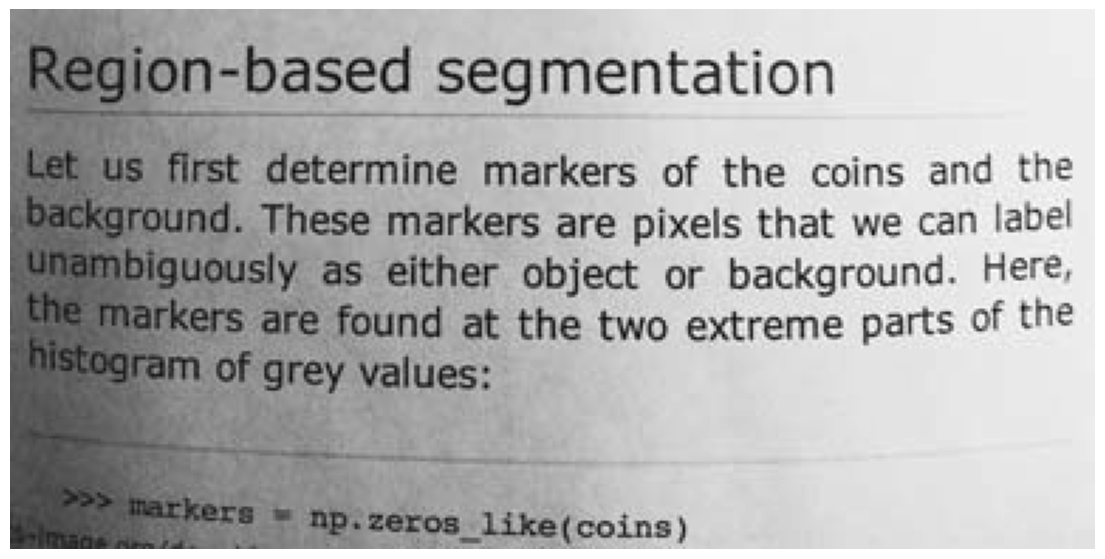

In [4]:
text = data.page()
image_show(text)

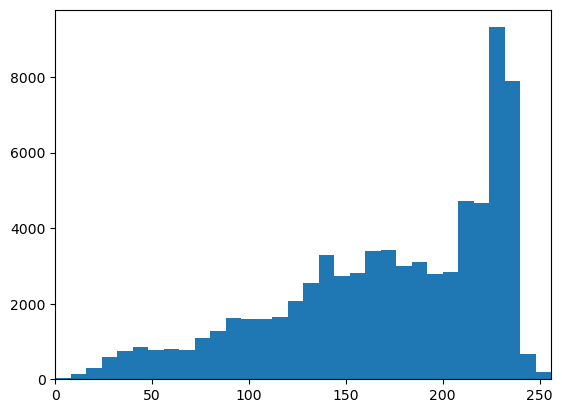

In [9]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

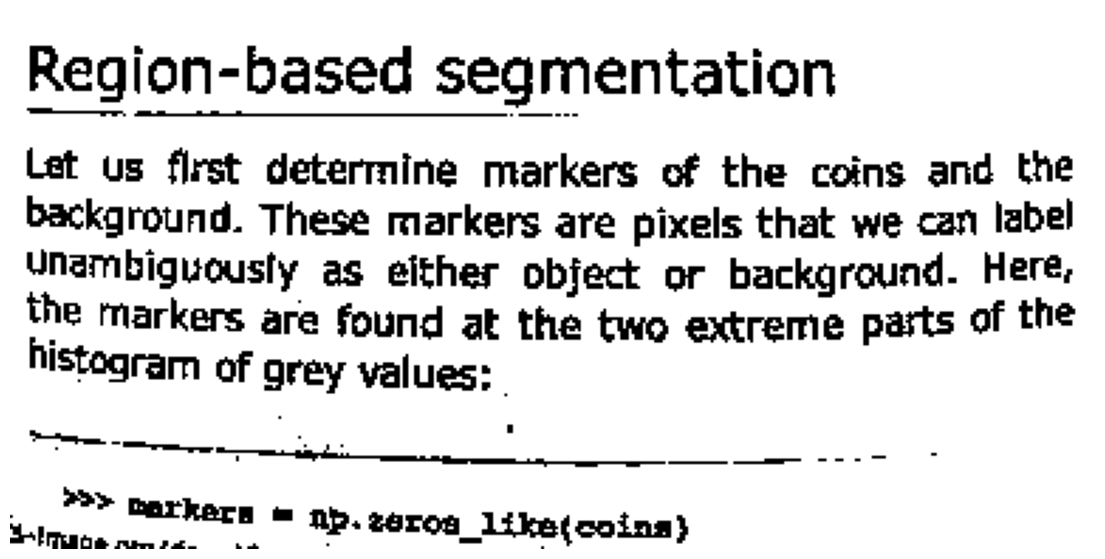

In [34]:
text_threshold = filters.threshold_local(text,block_size=61, offset=10) 
image_show(text > text_threshold);

# This is 7/10
Seems to work find for text.

# PART 2

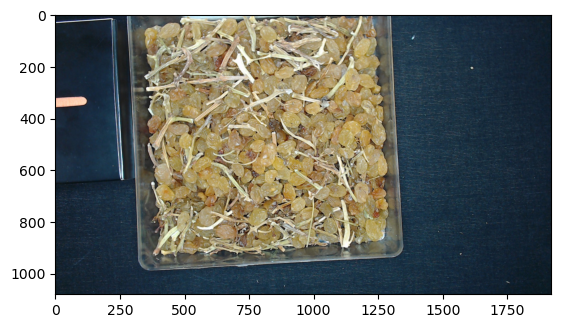

In [36]:
# import the image
from skimage import io
image = io.imread('raisins/r1.jpg') 
plt.imshow(image);

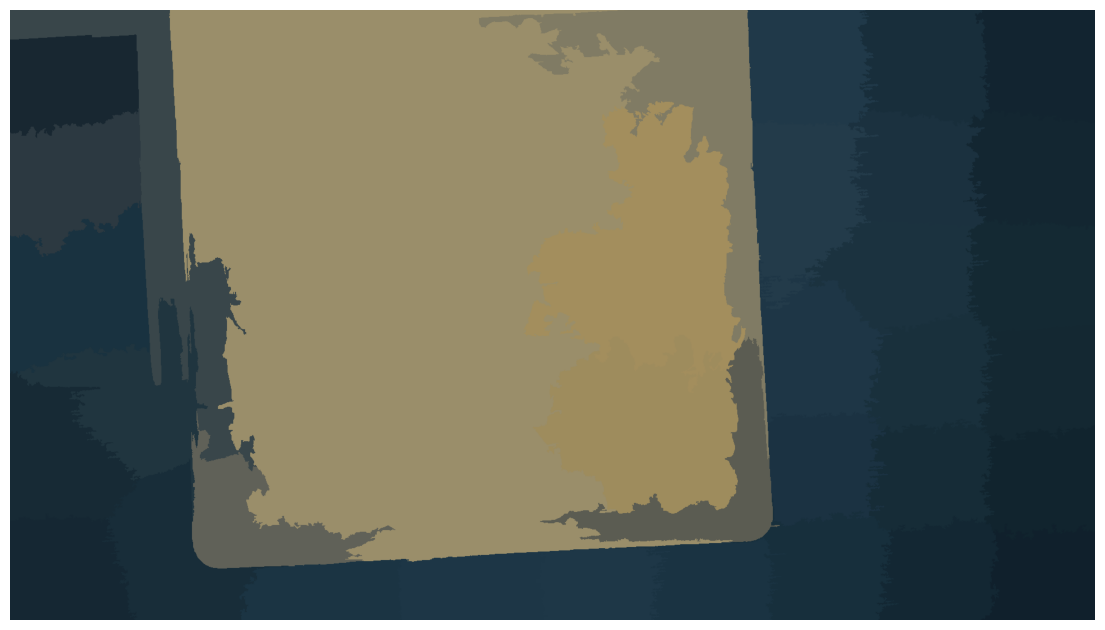

In [478]:
image_slic = seg.slic(image,n_segments = 56)
image_show(color.label2rgb(image_slic, image, kind='avg'));

In [479]:
z = image_slic.copy()
x = color.label2rgb(z, image, kind='avg')
image_gray = color.rgb2gray(x)

MIN: 0.0 MAX 1.0 MEDIAN 0.2156137254901961 MEAN 0.5018717953138238


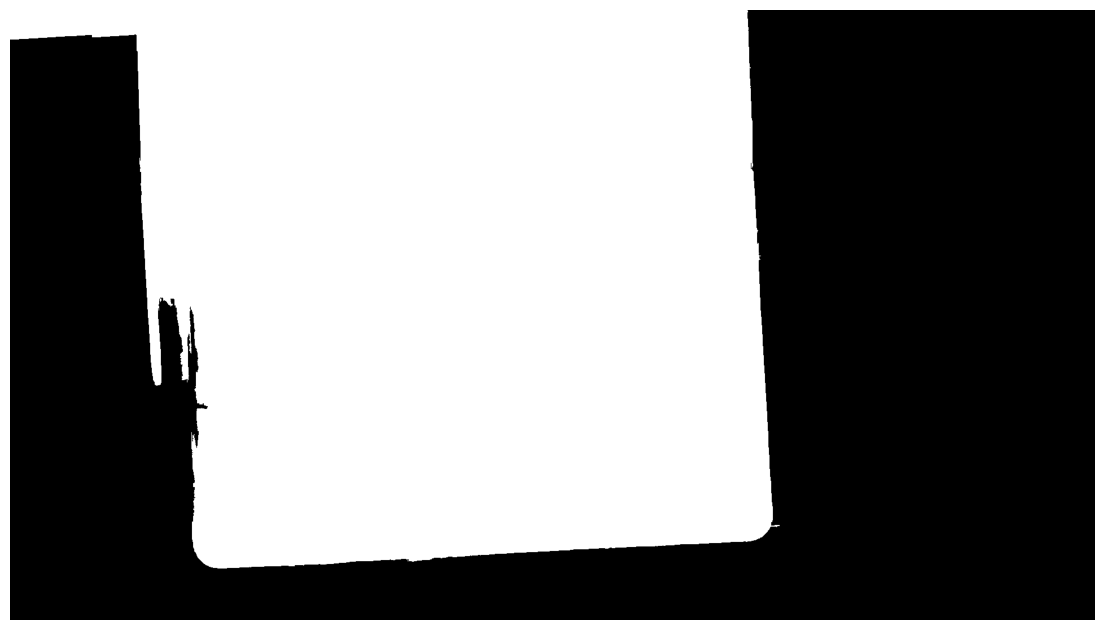

In [481]:
b = image_gray[:, :]
mean_b = np.mean(b)
median_b = np.median(b)
print(
    f'MIN: {np.min(b)} MAX {np.max(b)} MEDIAN {np.median(b)} MEAN {np.mean(b)}'
    )
b[b < mean_b]=0
b[b > mean_b]=1
image_gray[:, :] = b
image_show(image_gray);

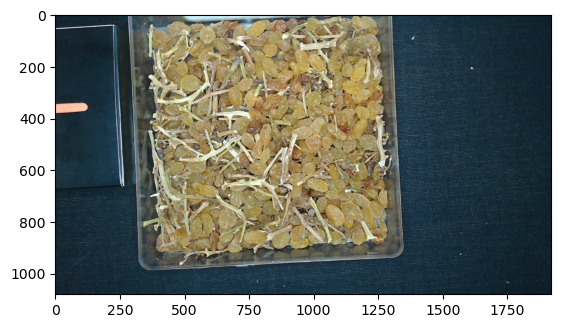

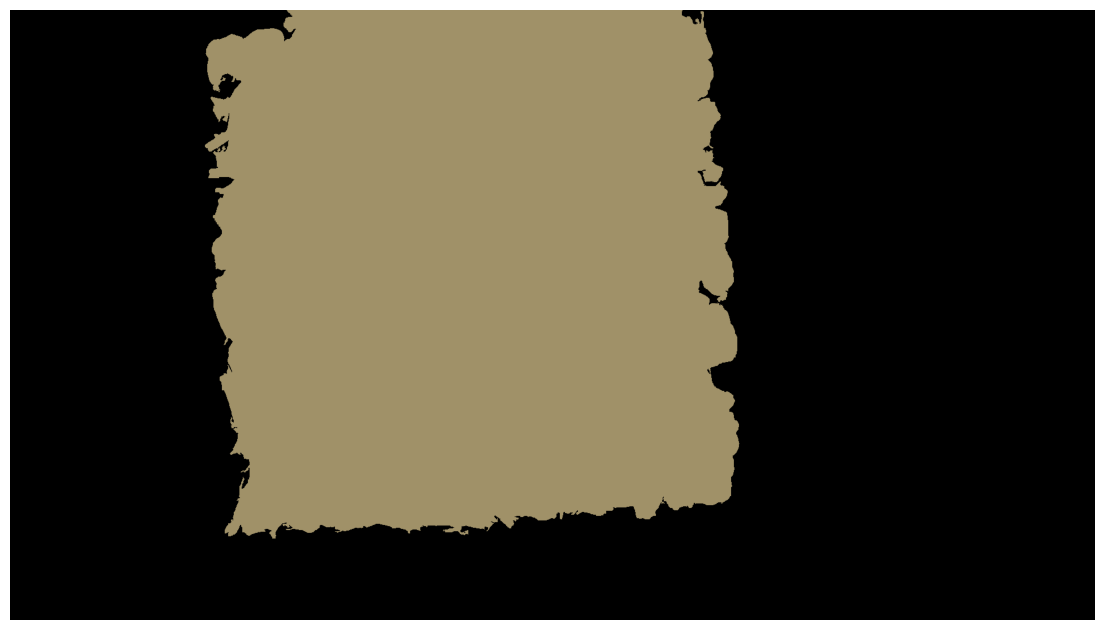

In [149]:
image = io.imread('raisins/r9.jpg') 
plt.imshow(image);
image_slic = seg.slic(image,n_segments=4)
image_slic[image_slic < 2] = 0
image_show(color.label2rgb(z, image, kind='avg'));

# SEEMS USEFUL

## Let's try PCA

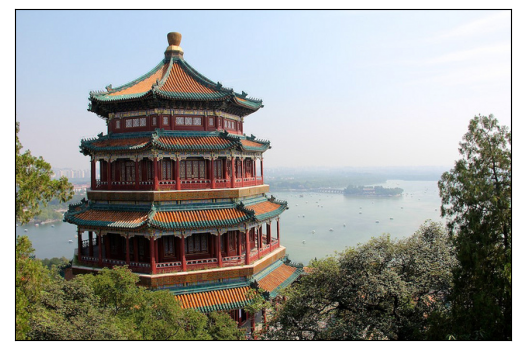

In [507]:
# Preparing data for clustering
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);
data = china / 255.0
ax.imshow(data);
data = data.reshape(427 * 640, 3)

In [494]:
# Clustering using K-Means
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(2)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
china_recolored = new_colors.reshape(china.shape)

Text(0.5, 1.0, '16-color Image')

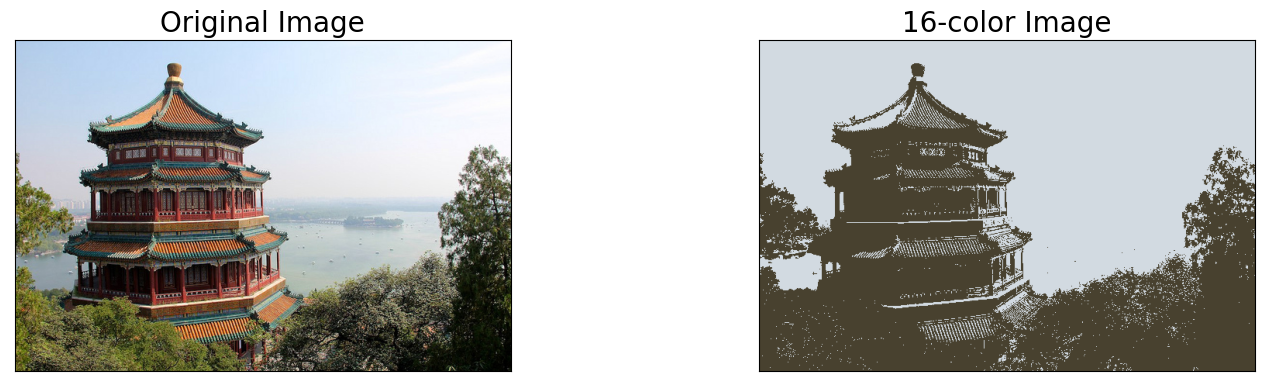

In [508]:
# Done, plotting.
fig, ax = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.5)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=20)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=20)

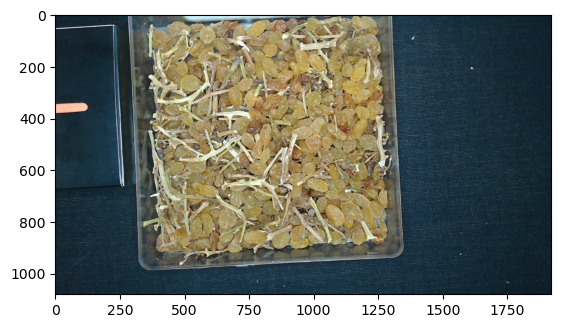

In [517]:
# Preparing data for clustering
image = io.imread('raisins/r9.jpg') 
plt.imshow(image);

ValueError: cannot reshape array of size 6220800 into shape (518400,3)

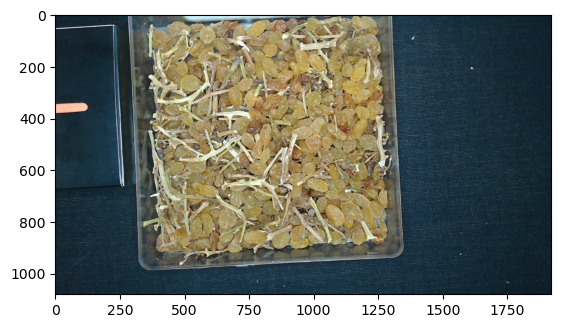

In [539]:
data = image / 255.0
plt.imshow(data);
data = data.reshape(1080 * 1920, 3)

In [537]:
kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
raisin_re = new_colors.reshape(image.shape)

Text(0.5, 1.0, '4-color Image')

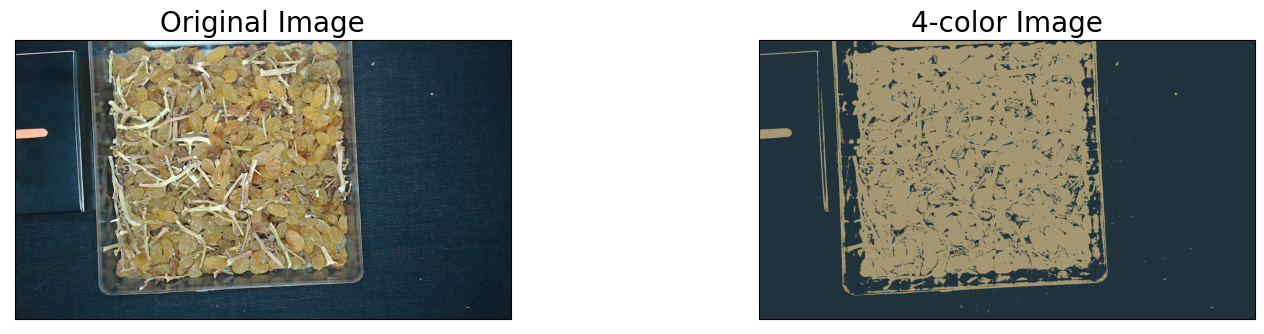

In [538]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.5)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=20)
ax[1].imshow(raisin_re)
ax[1].set_title('4-color Image', size=20)

In [569]:
from PIL import Image

image = Image.open('raisins/r9.jpg')
new_image = image.resize((image.width//10, image.height//10))
image_array = np.array(new_image)

In [553]:
def scale_under_one_linear(image, h, w, c):
    data_n = image / 255.0
    plt.imshow(data_n);
    data_n = data_n.reshape(h * w, c)
    return data_n

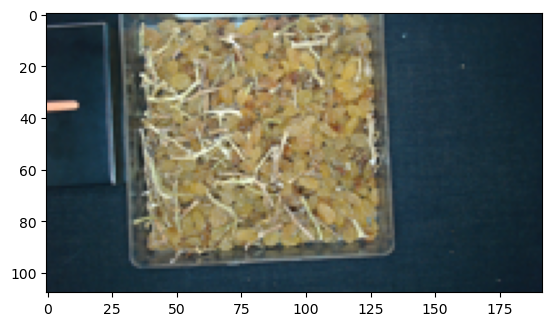

In [570]:
z = scale_under_one_linear(image_array, 108, 192, 3)

In [592]:
kmeans = MiniBatchKMeans(2)
kmeans.fit(z)
new_colors = kmeans.cluster_centers_[kmeans.predict(z)]
raisin_re = new_colors.reshape(image_array.shape)

Text(0.5, 1.0, '4-color Image')

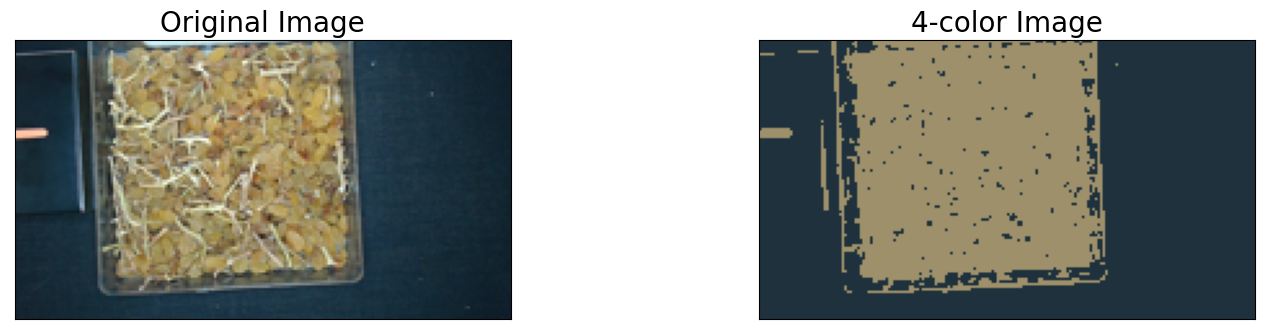

In [593]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.5)
ax[0].imshow(image_array)
ax[0].set_title('Original Image', size=20)
ax[1].imshow(raisin_re)
ax[1].set_title('4-color Image', size=20)

# ! Even with the downscaling PCA doesn't seem to have as good as results as  SLIC